In [1]:
import numpy as np
import IPython.display as ipd
import pandas as pd
import matplotlib as plt
import seaborn as sns
import sklearn as skl
import sklearn.utils, sklearn.preprocessing

import utils

plt.rcParams['figure.figsize'] = (17, 5)

The base for this code and the source of the Dataset come from FMAL A Dataset for Music Analysis:
[Source](https://github.com/mdeff/fma)

In [2]:
tracks = utils.load('./input/tracks.csv')
genres = utils.load('./input/genres.csv')
features = utils.load('./input/features.csv')


## Breaking Down the 4 key subsets of Tracks

In [3]:
ipd.display(tracks['track'].head())
ipd.display(tracks['album'].head())
ipd.display(tracks['artist'].head())

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
2,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
3,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
5,0,2008-11-26 01:44:45,2009-01-05,NaN,4,1,<p></p>,6073,NaN,[],AWOL - A Way Of Life,7,Album
10,0,2008-11-26 01:45:08,2008-02-06,NaN,4,6,NaN,47632,NaN,[],Constant Hitmaker,2,Album
20,0,2008-11-26 01:45:05,2009-01-06,NaN,2,4,"<p> ""spiritual songs"" from Nicky Cook</p>",2710,NaN,[],Niris,13,Album


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
2,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
3,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
5,2006-01-01,NaT,NaN,"<p>A Way Of Life, A Collective of Hip-Hop from...",0,2008-11-26 01:42:32,9,1,40.058324,New Jersey,-74.405661,"Sajje Morocco,Brownbum,ZawidaGod,Custodian of ...",AWOL,The list of past projects is 2 long but every1...,[awol],http://www.AzillionRecords.blogspot.com,NaN
10,NaT,NaT,"Mexican Summer, Richie Records, Woodsist, Skul...","<p><span style=""font-family:Verdana, Geneva, A...",3,2008-11-26 01:42:55,74,6,NaN,NaN,NaN,"Kurt Vile, the Violators",Kurt Vile,NaN,"[philly, kurt vile]",http://kurtvile.com,NaN
20,1990-01-01,2011-01-01,NaN,<p>Songs written by: Nicky Cook</p>\n<p>VOCALS...,2,2008-11-26 01:42:52,10,4,51.895927,Colchester England,0.891874,Nicky Cook\n,Nicky Cook,NaN,"[instrumentals, experimental pop, post punk, e...",NaN,NaN


In [4]:
ipd.display(tracks['track'].tail())
ipd.display(tracks['album'].tail())
ipd.display(tracks['artist'].tail())

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
155316,320000,0,NaN,2017-03-30 15:23:34,NaT,162,1,Rock,[25],"[25, 12]",NaN,122,NaN,Creative Commons Attribution-NonCommercial-NoD...,102,NaN,3,NaN,[],The Auger
155317,320000,0,NaN,2017-03-30 15:23:36,NaT,217,1,Rock,[25],"[25, 12]",NaN,194,NaN,Creative Commons Attribution-NonCommercial-NoD...,165,NaN,4,NaN,[],Let's Skin Ruby
155318,320000,0,NaN,2017-03-30 15:23:37,NaT,404,2,Rock,[25],"[25, 12]",NaN,214,NaN,Creative Commons Attribution-NonCommercial-NoD...,168,NaN,6,NaN,[],My House Smells Like Kim Deal/Pulp
155319,320000,0,NaN,2017-03-30 15:23:39,NaT,146,0,Rock,[25],"[25, 12]",NaN,336,NaN,Creative Commons Attribution-NonCommercial-NoD...,294,NaN,5,NaN,[],The Man With Two Mouths
155320,320000,0,NaN,2017-03-30 09:15:36,NaT,198,1,NaN,"[10, 12, 169]","[169, 10, 12, 9]",NaN,972,NaN,Attribution-NonCommercial,705,NaN,7,NaN,"[ballad, epic, rockabilly, curse, hex, hard ro...",Another Trick Up My Sleeve (Instrumental)


,comments,date_created,date_released,engineer,favorites,id,information,listens,producer,tags,title,tracks,type
track_id,,,,,,,,,,,,,
155316,0,2017-03-30 15:20:35,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,[],"Live at Monty Hall, 2/17/2017",6,Live Performance
155317,0,2017-03-30 15:20:35,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,[],"Live at Monty Hall, 2/17/2017",6,Live Performance
155318,0,2017-03-30 15:20:35,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,[],"Live at Monty Hall, 2/17/2017",6,Live Performance
155319,0,2017-03-30 15:20:35,2017-02-17,NaN,0,22940,"<p>A live performance at Monty Hall on Feb 17,...",1506,Monty Hall,[],"Live at Monty Hall, 2/17/2017",6,Live Performance
155320,0,2017-03-26 16:22:18,2017-03-26,NaN,1,22906,NaN,7481,NaN,"[ballad, epic, rockabilly, curse, hex, hard ro...",What I Tell Myself Vol. 2,11,Album


,active_year_begin,active_year_end,associated_labels,bio,comments,date_created,favorites,id,latitude,location,longitude,members,name,related_projects,tags,website,wikipedia_page
track_id,,,,,,,,,,,,,,,,,
155316,NaT,NaT,NaN,NaN,0,2017-03-30 15:18:28,0,24357,NaN,New Jersey,NaN,GILLIAN/JENNA/DECLAN/JAIME,Spowder,NaN,[spowder],https://spowder.bandcamp.com/,NaN
155317,NaT,NaT,NaN,NaN,0,2017-03-30 15:18:28,0,24357,NaN,New Jersey,NaN,GILLIAN/JENNA/DECLAN/JAIME,Spowder,NaN,[spowder],https://spowder.bandcamp.com/,NaN
155318,NaT,NaT,NaN,NaN,0,2017-03-30 15:18:28,0,24357,NaN,New Jersey,NaN,GILLIAN/JENNA/DECLAN/JAIME,Spowder,NaN,[spowder],https://spowder.bandcamp.com/,NaN
155319,NaT,NaT,NaN,NaN,0,2017-03-30 15:18:28,0,24357,NaN,New Jersey,NaN,GILLIAN/JENNA/DECLAN/JAIME,Spowder,NaN,[spowder],https://spowder.bandcamp.com/,NaN
155320,NaT,NaT,NaN,<p>****NOTE FOR USING OUR MUSIC ON YOUTUBE****...,1,2016-02-04 17:26:24,12,21615,NaN,"Jersey City, NJ 07302",NaN,"Alishia Taiping (lead vocals, bass) \nDan Pier...",Forget the Whale,** PLEASE CONNECT WITH US THROUGH FACEBOOK! WE...,"[forget the whale, witches, rockabilly, rb, rn...",NaN,NaN


In [5]:
print(tracks['track'].describe())


            bit_rate       comments       duration      favorites  \
count  106574.000000  106574.000000  106574.000000  106574.000000   
mean   263274.695048       0.031621     277.849100       3.182521   
std     67623.443584       0.321993     305.518553      13.513820   
min        -1.000000       0.000000       0.000000       0.000000   
25%    192000.000000       0.000000     149.000000       0.000000   
50%    299914.000000       0.000000     216.000000       1.000000   
75%    320000.000000       0.000000     305.000000       3.000000   
max    448000.000000      37.000000   18350.000000    1482.000000   

           interest        listens         number  
count  1.065740e+05  106574.000000  106574.000000  
mean   3.541310e+03    2329.353548       8.260945  
std    1.901743e+04    8028.070647      15.243271  
min    2.000000e+00       0.000000       0.000000  
25%    5.990000e+02     292.000000       2.000000  
50%    1.314000e+03     764.000000       5.000000  
75%    3.05900

In [6]:
print(tracks['album'].describe())


            comments      favorites             id       listens  \
count  106574.000000  106574.000000  106574.000000  1.065740e+05   
mean        0.394946       1.286927   12826.933914  3.212031e+04   
std         2.268915       3.133035    6290.261805  1.478532e+05   
min        -1.000000      -1.000000      -1.000000 -1.000000e+00   
25%         0.000000       0.000000    7793.000000  3.361000e+03   
50%         0.000000       0.000000   13374.000000  8.982000e+03   
75%         0.000000       1.000000   18203.000000  2.363500e+04   
max        53.000000      61.000000   22940.000000  3.564243e+06   

              tracks  
count  106574.000000  
mean       19.721452  
std        39.943673  
min        -1.000000  
25%         7.000000  
50%        11.000000  
75%        17.000000  
max       652.000000  


In [7]:
tracks['artist'].describe()

,comments,favorites,id,latitude,longitude
count,106574.000000,106574.000000,106574.000000,44544.000000,44544.000000
mean,1.894702,30.041915,12036.770404,39.901626,-38.668642
std,6.297679,100.511408,6881.420867,18.240860,65.237220
min,-1.000000,-1.000000,1.000000,-45.878760,-157.526855
25%,0.000000,1.000000,6443.000000,39.271398,-79.997459
50%,0.000000,5.000000,12029.500000,41.387917,-73.554431
75%,1.000000,16.000000,18011.000000,48.856930,4.351710
max,79.000000,963.000000,24357.000000,67.286005,175.277000


In [8]:
medium = tracks[tracks['set', 'subset'] <= 'medium']
medium.shape

(25000, 52)

TypeError: 'module' object is not callable

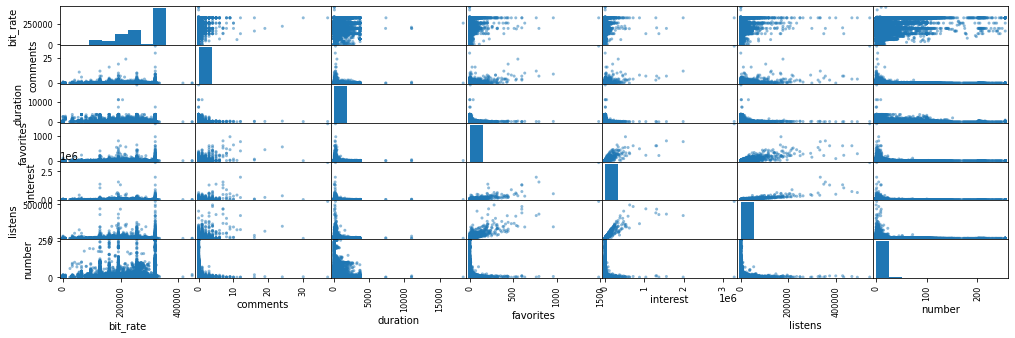

In [9]:
pd.plotting.scatter_matrix(tracks['track']);
plt.figure()

TypeError: 'module' object is not callable

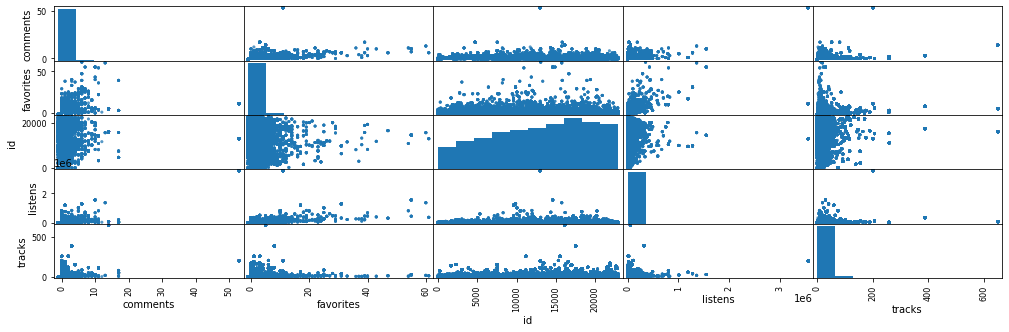

In [10]:
pd.plotting.scatter_matrix(tracks['album'])
plt.figure()

TypeError: 'module' object is not callable

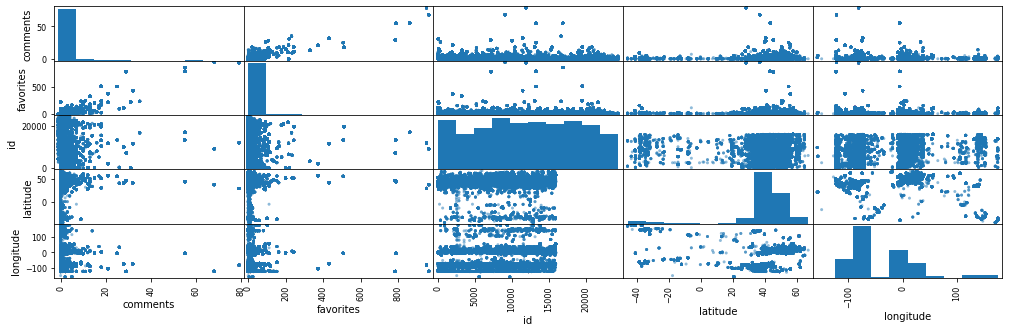

In [11]:
pd.plotting.scatter_matrix(tracks['artist'])
plt.figure()

# Genres



In [12]:
print(genres.sort_values('#tracks').head())
print(genres.sort_values('#tracks').tail())

          #tracks  parent                  title  top_level
genre_id                                                   
175             0      86              Bollywood          2
178             0       4                 Be-Bop          4
377             1      19              Deep Funk         14
173             4      86  N. Indian Traditional          2
493             4     651          Western Swing          9
          #tracks  parent         title  top_level
genre_id                                          
10          13845       0           Pop         10
1235        14938       0  Instrumental       1235
12          32923       0          Rock         12
15          34413       0    Electronic         15
38          38154       0  Experimental         38


In [13]:
genres.describe()

,#tracks,parent,top_level
count,163.000000,163.000000,163.000000
mean,2142.085890,60.447853,51.374233
std,5199.542574,185.396011,211.470836
min,0.000000,0.000000,2.000000
25%,125.000000,5.000000,5.000000
50%,563.000000,15.000000,12.000000
75%,1846.500000,38.000000,20.000000
max,38154.000000,1235.000000,1235.000000


TypeError: 'module' object is not callable

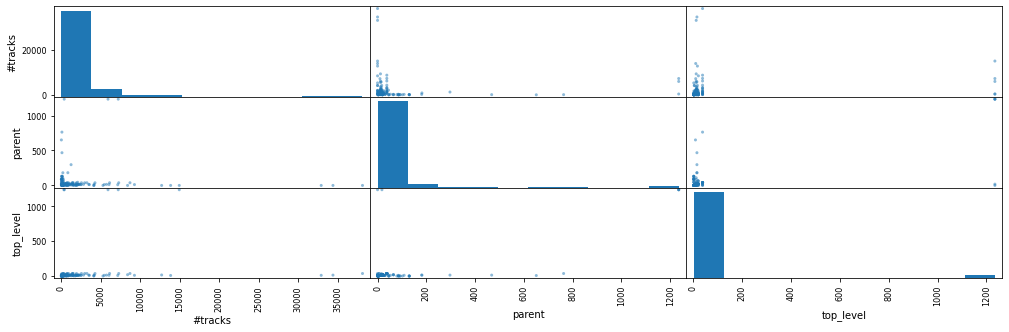

In [14]:
pd.plotting.scatter_matrix(genres)
plt.figure()

## Features breakdown

In [15]:
features.describe()

feature       chroma_cens                                               \
statistics       kurtosis                                                
number                 01             02             03             04   
count       106574.000000  106574.000000  106574.000000  106574.000000   
mean             0.439999       0.199756       0.334683       0.270263   
std             32.285524      11.120903       9.980692      19.074557   
min             -1.955806      -1.936607      -1.967450      -3.000000   
25%             -0.636597      -0.665684      -0.629114      -0.644747   
50%             -0.176557      -0.221131      -0.152708      -0.191032   
75%              0.485000       0.410097       0.529836       0.446800   
max           8843.367188    2864.075195    1777.615967    4257.045898   

feature                                                                 \
statistics                                                               
number                 05             06             07             08   
count       106574.000000  106574.000000  106574.000000  106574.000000   
mean             0.294806       0.315635       0.273511       0.334927   
std             15.025603      12.176182      16.975991      15.486402   
min             -1.921206      -1.923740      -1.935382      -3.000000   
25%             -0.656779      -0.622579      -0.646798      -0.635741   
50%             -0.198025      -0.152089      -0.187959      -0.161478   
75%              0.452680       0.513112       0.472161       0.525814   
max           3188.034424    2809.779297    4281.090820    3869.482178   

feature                                   ...        tonnetz                 \
statistics                                ...            std                  
number                 09             10  ...             04             05   
count       106574.000000  106574.000000  ...  106574.000000  106574.000000   
mean             0.201939       0.285631  ...       0.098667       0.021569   
std              7.364308       8.175257  ...       0.037101       0.006076   
min             -3.000000      -3.000000  ...       0.005681       0.000087   
25%             -0.667799      -0.660292  ...       0.071240       0.017226   
50%             -0.214547      -0.181836  ...       0.093500       0.020636   
75%              0.432480       0.495568  ...       0.121007       0.024990   
max           1217.209473    1772.918213  ...       0.332470       0.092869   

feature                              zcr                                \
statistics                      kurtosis            max           mean   
number                 06             01             01             01   
count       106574.000000  106574.000000  106574.000000  106574.000000   
mean             0.021880      29.464638       0.381368       0.052755   
std              0.006125      88.975395       0.183414       0.032634   
min              0.000368      -1.967539       0.010254       0.000055   
25%              0.017542       3.316640       0.246582       0.032913   
50%              0.020964       9.714652       0.357910       0.047077   
75%              0.025252      26.981386       0.471680       0.064616   
max              0.116128    8438.014648       0.999512       0.878024   

feature                                                                 
statistics         median            min           skew            std  
number                 01             01             01             01  
count       106574.000000  106574.000000  106574.000000  106574.000000  
mean             0.043576       0.002342       3.214247       0.040303  
std              0.031703       0.005152       3.045345       0.027259  
min              0.000000       0.000000     -15.727972       0.000436  
25%              0.024902       0.000000       1.400700       0.022054  
50%              0.037598       0.000000       2.404834       0.033566  
75%              0.054199   

In [17]:
features.head() 


feature    chroma_cens                                                    \
statistics    kurtosis                                                     
number              01        02        03        04        05        06   
track_id                                                                   
2             7.180653  5.230309  0.249321  1.347620  1.482478  0.531371   
3             1.888963  0.760539  0.345297  2.295201  1.654031  0.067592   
5             0.527563 -0.077654 -0.279610  0.685883  1.937570  0.880839   
10            3.702245 -0.291193  2.196742 -0.234449  1.367364  0.998411   
20           -0.193837 -0.198527  0.201546  0.258556  0.775204  0.084794   

feature                                             ...   tonnetz            \
statistics                                          ...       std             
number            07        08        09        10  ...        04        05   
track_id                                            ...                       
2           1.481593  2.691455  0.866868  1.341231  ...  0.054125  0.012226   
3           1.366848  1.054094  0.108103  0.619185  ...  0.063831  0.014212   
5          -0.923192 -0.927232  0.666617  1.038546  ...  0.040730  0.012691   
10          1.770694  1.604566  0.521217  1.982386  ...  0.074358  0.017952   
20         -0.289294 -0.816410  0.043851 -0.804761  ...  0.095003  0.022492   

feature                     zcr                                          \
statistics             kurtosis       max      mean    median       min   
number            06         01        01        01        01        01   
track_id                                                                  
2           0.012111   5.758890  0.459473  0.085629  0.071289  0.000000   
3           0.017740   2.824694  0.466309  0.084578  0.063965  0.000000   
5           0.014759   6.808415  0.375000  0.053114  0.041504  0.000000   
10          0.013921  21.434212  0.452148  0.077515  0.071777  0.000000   
20          0.021355  16.669037  0.469727  0.047225  0.040039  0.000977   

feature                         
statistics      skew       std  
number            01        01  
track_id                        
2           2.089872  0.061448  
3           1.716724  0.069330  
5           2.193303  0.044861  
10          3.542325  0.040800  
20          3.189831  0.030993  

[5 rows x 518 columns]

# Normalization for genre classification


In [19]:
medium = tracks['set', 'subset'] <= 'medium'

train = tracks['set', 'split'] == 'training'
val = tracks['set', 'split'] == 'validation'
test = tracks['set', 'split'] == 'test'

y_train = tracks.loc[medium & train, ('track', 'genre_top')]
y_test = tracks.loc[medium & test, ('track', 'genre_top')]
X_train = features.loc[medium & train, 'mfcc']
X_test = features.loc[medium & test, 'mfcc']

print('{} training examples, {} testing examples'.format(y_train.size, y_test.size))
print('{} features, {} classes'.format(X_train.shape[1], np.unique(y_train).size))

19922 training examples, 2573 testing examples
140 features, 16 classes


In [20]:
scaler = skl.preprocessing.StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

C:\Users\zholl\anaconda3\envs\cpsc4310\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\zholl\anaconda3\envs\cpsc4310\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,
C:\Users\zholl\anaconda3\envs\cpsc4310\lib\site-packages\sklearn\utils\validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


array([[ 2.12472231e-01, -1.21575759e-01,  1.59221131e-02, ...,
         1.54875684e-01, -4.83327352e-02,  4.18859095e-01],
       [ 2.68300051e+00,  7.53850874e-01,  1.75008045e+00, ...,
        -3.90599650e-01, -6.68296344e-01, -6.28603663e-01],
       [-2.61655770e-01, -1.27442969e-01, -1.19880870e-03, ...,
        -8.99907309e-01, -4.09880552e-01, -1.04398104e+00],
       ...,
       [-4.66801248e-01, -5.24603794e-01, -9.51418934e-02, ...,
         8.23938048e-01,  2.48148052e+00,  1.74553805e+00],
       [-4.06846860e-01, -2.21500978e-01,  2.92898850e-02, ...,
        -3.67499399e-01,  2.93762445e-01,  4.39451865e-01],
       [-4.54966022e-01, -7.61709511e-01,  2.04847206e-01, ...,
         1.66878453e-01, -1.60391351e-02,  1.00648067e+00]])